In [1]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Brunel MPhil\Python Data\Combined Indicator Data.csv")

In [3]:
data = data.dropna()

In [4]:
data = data.rename(columns = {"Unnamed: 0":"Date"})
data = data.loc[::-1].reset_index(drop=True)
data ['% Change'] = data['Close'].pct_change()*100
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
df = data.dropna()
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
2015-08-01,08-01-2015,1.71,32.74,0.23,-416,-347,17.29,2062.1436,1.788957
2015-09-01,09-01-2015,2.04,34.68,0.20,-511,364,18.55,2044.8099,-0.840567
2015-12-01,12-01-2015,2.39,34.50,0.26,-331,407,17.23,2028.2638,-0.809175
2015-01-13,13-01-2015,1.58,33.51,0.46,-60,-149,16.96,2023.0292,-0.258083
2015-01-14,14-01-2015,2.00,29.92,0.38,-164,350,15.34,2011.2729,-0.581124
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.49,14.68,0.47,-30,214,20.42,4027.2622,0.591566
2022-11-25,25-11-2022,1.57,14.90,0.57,59,199,20.50,4026.1155,-0.028473
2022-11-28,28-11-2022,1.56,14.38,0.36,-147,-429,22.21,3963.9419,-1.544258
2022-11-29,29-11-2022,1.60,14.06,0.32,-190,62,21.89,3957.6259,-0.159336


In [5]:
df['PCR'] = df['PCR'].shift(1) 
df['CS Fear Barometer'] = df['CS Fear Barometer'].shift(1)
df['Bl. Sent. H/L'] = df['Bl. Sent. H/L'].shift(1)
df['Bl. 52 Week H/L'] = df['Bl. 52 Week H/L'].shift(1)
df['AD. Dec Ratio'] = df['AD. Dec Ratio'].shift(1)
df['VIX'] = df['VIX'].shift(1)
df['Direction'] = [1 if i>0 else 0 for i in df['% Change']]
df['Direction'] = df['Direction'].shift(-1, fill_value=0)
df = df.dropna()
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change,Direction
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,2044.8099,-0.840567,0
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,2028.2638,-0.809175,0
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,2023.0292,-0.258083,0
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,2011.2729,-0.581124,0
2015-01-15,15-01-2015,2.00,29.92,0.38,-164.0,350.0,15.34,1992.6703,-0.924917,1
...,...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,4027.2622,0.591566,0
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,4026.1155,-0.028473,0
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,3963.9419,-1.544258,0
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,3957.6259,-0.159336,1


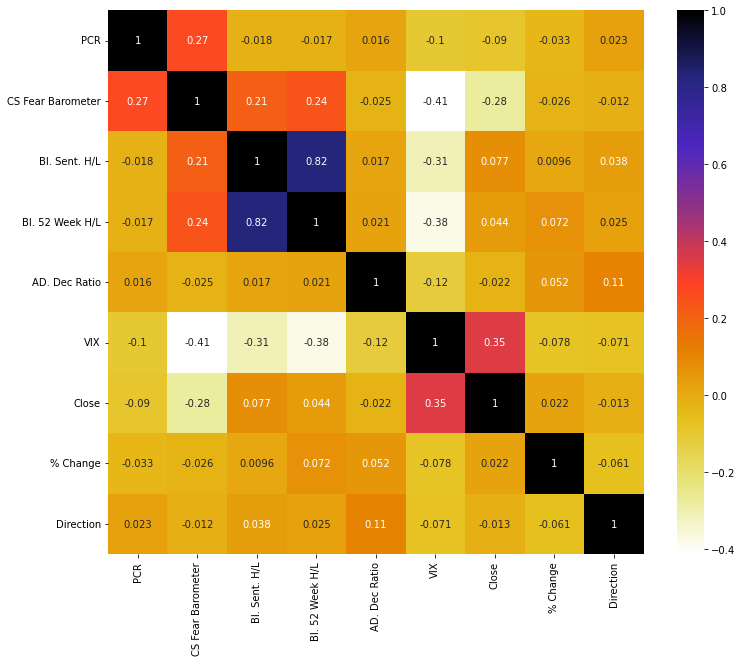

In [7]:
df_correlations = df.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df_correlations, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
df = df.drop(columns ='Close')

# Test variables set 1 
X = df.copy()
X = X.drop(columns =['Direction','Date'])
y = df['Direction']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1, shuffle = False)
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_predict = log_reg.predict(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 
print(y_predict.shape)

(1381, 7)
(592, 7)
(1381,)
(592,)
(592,)


In [32]:
predict_proba = log_reg.predict_proba(X_train)

In [33]:
#Training Accuracy 
log_reg.score(X_train, y_train)

0.5481535119478639

In [34]:
#Testing Accuracy
log_reg.score(X_test, y_test)

0.5320945945945946

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[ 87, 196],
       [ 81, 228]], dtype=int64)

In [45]:
#Transforming confusion matrix

cm_norm = cnf_matrix / cnf_matrix.sum(axis=1).reshape(-1,1)

cm_norm

array([[0.30742049, 0.69257951],
       [0.26213592, 0.73786408]])

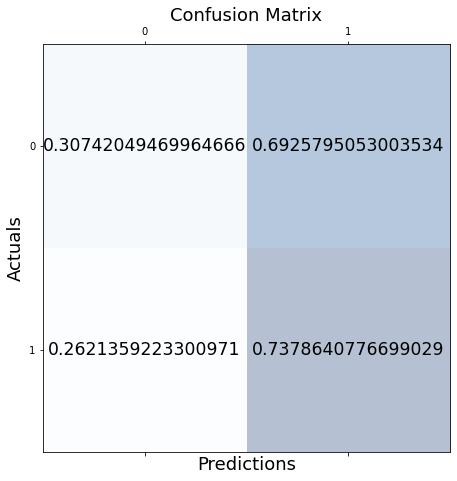

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_norm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(x=j, y=i,s=cm_norm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39       283
           1       0.54      0.74      0.62       309

    accuracy                           0.53       592
   macro avg       0.53      0.52      0.50       592
weighted avg       0.53      0.53      0.51       592



In [53]:
#Hyperparameter Tuning

C_List = np.geomspace(1e-5,1e5, num = 20)

In [54]:
#LogisticRegressionCV 

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold 
kf = KFold(n_splits=3, random_state = 0, shuffle = True)

In [58]:
#Logistic Regression CV 

Log_reg3 = LogisticRegressionCV(random_state = 15, Cs = C_List)
Log_reg3.fit(X_train, y_train)
print("Accuracy score :", Log_reg3.score(X_train, y_train))

print("Optimal C :", Log_reg3.C_)

Accuracy score : 0.556842867487328
Optimal C : [0.00428133]
